# Graded Assignment 2
# Credit Card Customer Segmentation

For each question, there are clear instructions in each cell. Follow those instructions and write the code after each block of:

YOUR CODE HERE

Please use the exact variable name if it is specified in the comment.

We’ll run a Python test script against your program to test whether each function implementation is correct.

In [1]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
"""
Execute this cell to import all the libraries/functions you need for the entire exercise
"""

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import imp
from nose.tools import assert_equal
from pandas.testing import assert_frame_equal, assert_series_equal
import numpy.testing as nt
sol = imp.load_compiled("sol", "./.sol.py")

### Part 1. Data Loading (20 pts)

In [2]:
"""
Q1 (5pts).

Load the Credit Card Dataset from data.csv into a pandas dataframe called df.

"""

df = pd.read_csv("data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(sol.df, df)

In [4]:
"""
Q2 (10pts).

- Analyze the summary statistics of the dataframe in Q1.

- Store the number of features with missing values in a variable called missing_feat

- Drop all samples that have missing values.

- Store the updated dataframe in a variable called df_clean
"""

df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
missing_feat = 2

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [9]:
df_clean = df.copy()

In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHA

In [11]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(sol.missing_feat, missing_feat)

In [12]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(sol.df_clean, df_clean)

In [13]:
"""
Q3 (5pts).

- Store the data without customer identification as a numpy array into a variable called X. (Note: do not modify df_clean itself).
  
"""

df_clean.columns


Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [14]:
X = df_clean[['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']]

In [15]:
##########################
### TEST YOUR SOLUTION ###
##########################

nt.assert_equal(sol.X, X)

### Part 2. Data Preprocessing (10 pts)

In [16]:
"""
Q4 (10pts).

- Apply MinMax Feature Scaling to all of the features in the loaded dataset.

- Store the scaled data in variables X_scaled.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

"""

scaler = MinMaxScaler()


In [17]:
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled

array([[2.14779454e-03, 8.18182000e-01, 1.94536779e-03, ...,
        1.82564563e-03, 0.00000000e+00, 1.00000000e+00],
       [1.68169097e-01, 9.09091000e-01, 0.00000000e+00, ...,
        1.40344791e-02, 2.22222000e-01, 1.00000000e+00],
       [1.31026136e-01, 1.00000000e+00, 1.57662475e-02, ...,
        8.20961806e-03, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.22871936e-03, 8.33333000e-01, 2.94456089e-03, ...,
        1.07843629e-03, 2.50000000e-01, 0.00000000e+00],
       [7.06688341e-04, 8.33333000e-01, 0.00000000e+00, ...,
        7.29475795e-04, 2.50000000e-01, 0.00000000e+00],
       [1.95717777e-02, 6.66667000e-01, 2.22932216e-02, ...,
        1.15527021e-03, 0.00000000e+00, 0.00000000e+00]])

In [19]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(type(sol.scaler), type(scaler))

In [20]:
##########################
### TEST YOUR SOLUTION ###
##########################

nt.assert_equal(sol.X_scaled, X_scaled)

### Part 3. Model Training and Evaluation (70 pts)

In [21]:
"""
Q5 (20 pts).

- Train K-Means Clustering Models with a random_state =  0 and n_init = 'auto' for k values: 7, 9, 11, 13, 15

- Store the trained clustering models for each k setting in a list called all_models.

- Store the inertia for each k setting in a list called all_inertia.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

This cell may take about a minute to complete.
"""

# Define the k values
k_values = [7, 9, 11, 13, 15]

# Initialize lists to store models and inertia values
all_models = []
all_inertia = []

# Train K-Means clustering models and store them
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X_scaled)
    all_models.append(kmeans)
    all_inertia.append(kmeans.inertia_)

print("Trained models:", all_models)
print("Inertia values:", all_inertia)


Trained models: [KMeans(n_clusters=7, random_state=0), KMeans(n_clusters=9, random_state=0), KMeans(n_clusters=11, random_state=0), KMeans(n_clusters=13, random_state=0), KMeans(n_clusters=15, random_state=0)]
Inertia values: [1785.232053282346, 1472.1020341654855, 1263.8181144914804, 1150.4393754415305, 1060.5917064906696]


In [22]:
##########################
### TEST YOUR SOLUTION ###
##########################
nt.assert_almost_equal(sol.all_inertia, all_inertia,5)

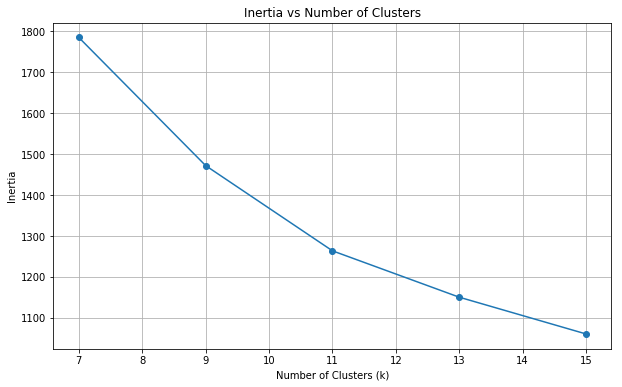

In [23]:
"""
Q6 (10 pts).

- Plot the inertia values calculated in Q5 with respect to the number of clusters.

- Label the x-axis and y-axis accordingly

NOTE: 
- Your plot cannot be autograded.  
- If you go to the guide, there will be a PDF with the solution plot.
- Please check it and if your answer matches, set the variable q6_plot_check = 'yes' .
"""

q6_plot_check = 'yes' # change to yes after you verify your plot


# Plot inertia values
plt.figure(figsize=(10, 6))
plt.plot(k_values, all_inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.grid(True)


###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

In [24]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal('yes', q6_plot_check)

In [25]:
"""
Q7 (10 pts).

- Observe the plot in Q6, based on the elbow method, which k value would be the most optimal choice?

- Store the most optimal k values as an integer into a variable called best_k

- Store the kmeans model corresponding to the best_k selected in a variable called best_kmeans.
"""


best_k = 11

In [26]:
best_kmeans = KMeans(n_clusters=11, random_state=0, n_init=10)

In [27]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(sol.best_k, best_k)

In [28]:
"""
Q8 (10 pts).

- Using the best_kmeans model, fetch the clustering labels for all of the samples 
  in the dataset and store the array in a variable called labels.

- Make a copy of the df_clean dataframe and store it in a new variable called df_clustered

- Add the clustering labels to the dataframe df_clustered as a new column called 'Cluster'.

"""

best_kmeans.fit(X_scaled)


KMeans(n_clusters=11, random_state=0)

In [29]:
best_kmeans.labels_

array([2, 2, 7, ..., 9, 6, 6], dtype=int32)

In [30]:
labels = best_kmeans.labels_
labels

array([2, 2, 7, ..., 9, 6, 6], dtype=int32)

In [31]:
df_clustered = df_clean.copy()
df_clustered

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [32]:
labels.shape

(8636,)

In [33]:
df_clustered["Cluster"] = labels

In [34]:
df_clustered

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,7
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,9
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,9
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,6


In [35]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(sol.df_clustered, df_clustered)

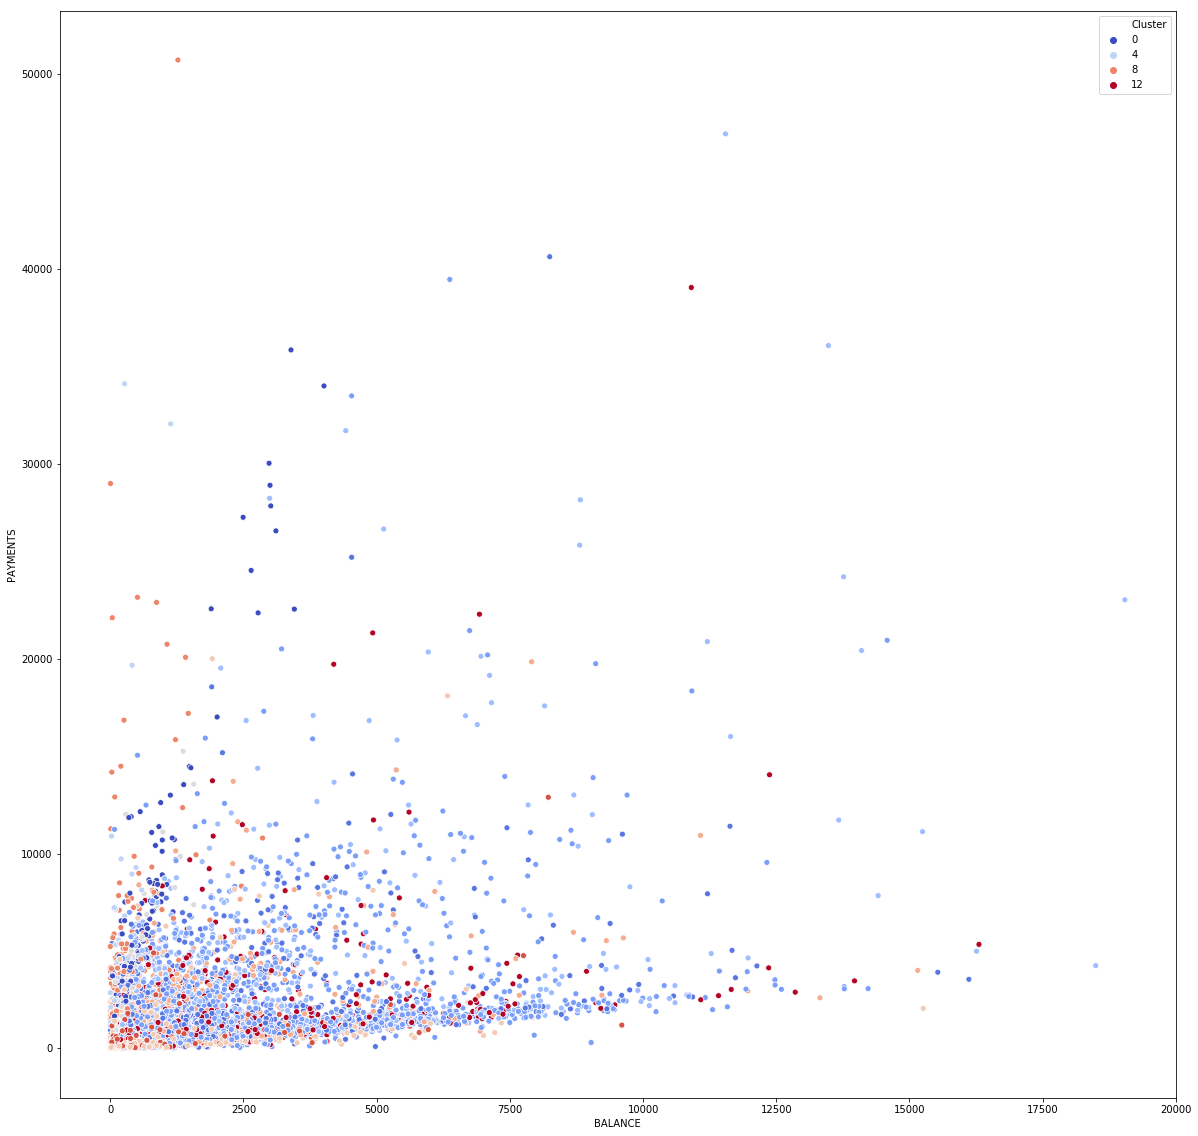

In [36]:
"""
Q9 (10 pts).

- Create a scatter plot with the unnormalized BALANCE as the x values 
  and PAYMENTS as the y values

- Assign points with labels based on their cluster labels

- Label the x-axis and y-axis accordingly.

- Display the legend.

NOTE: 
- Your plot cannot be autograded.  
- If you go to the guide, there will be a PDF with the solution plot.
- Please check it and if your answer matches, set the variable q9_plot_check = 'yes' .

"""
q9_plot_check = 'yes' # change to yes after you verify your plot

import seaborn as sns

plt.figure(figsize=(20,20))
sns.scatterplot(x='BALANCE', y='PAYMENTS', data=df_clustered, hue='Cluster', palette='coolwarm')

###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

In [37]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal('yes', q9_plot_check)

In [38]:
"""
Q10 (10 pts).

- Observe the plot in Q9 and provide an analysis of the potential customer profile for Cluster 0.

- How would you describe their overall BALANCE: 'low', 'average', 'high'. 
  Store the answer as a string in the variable balance.

- How would you describe their overall PAYMENTS: 'low, 'average', 'high'. 
  Store the answer as a string in the variable payments.

- Consider what this implies in terms of customer behavior (0pts)

"""

balance = 'low'
payments = 'average'


In [39]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(sol.balance, balance)

In [40]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(sol.payments, payments)